# TRABALHANDO COM DADOS DE FUTEBOL

## Neste projeto será desenvolvido um Pitch de ataque em uma partida de futebol específica
* Partida: SC Internacional vs Santos - 22/10/2023
* Pitch de chutes ao gol dos Jogadores do Inter de Porto Alegre

Passos:
* Encontrar os dados necessários através do web scraping no site sofascore.com
* Pegar CURL da API dos dados que irá utilizar
* Fazer a requisição com o requests
* Tratar a resposta Json da API 
* Gerar data frames para melhor análise e filtro dos dados 
* Utilizar a biblioteca mplsoccer para construir um Pitch de chutes em um "campo" de futebol
* Tratar as coordenadas dos chutes no Pitch com a biblioteca matplotlib

In [4]:
import json

Fazendo a requisição da API Shotmap do Site

In [2]:
import requests

headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'cache-control': 'max-age=0',
    'if-none-match': 'W/"eababef205"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Google Chrome";v="119", "Chromium";v="119", "Not?A_Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36',
}

response = requests.get('https://api.sofascore.com/api/v1/event/11067449/shotmap', headers=headers)

In [4]:
response.status_code

200

In [5]:
if response.status_code == 200:
    # Converte a resposta para um dicionário Python (ou lista, dependendo da estrutura)
    shots_dados = response.json()

    # Especifica o caminho do arquivo onde você deseja salvar o JSON
    caminho_arquivo = "resposta.json"

    # Abre o arquivo em modo de escrita
    with open(caminho_arquivo, 'w') as arquivo:
        # Usa a função dump para escrever os dados no arquivo em formato JSON
        json.dump(shots_dados, arquivo)

        print(f"A resposta foi salva em {caminho_arquivo}")
else:
    print(f"A solicitação falhou com o código de status {response.status_code}")

A resposta foi salva em resposta.json


Tratando o JSON da API

In [6]:
import pandas as pd

# Especifica o caminho do arquivo JSON
caminho_arquivo = "resposta.json"

# Lê o arquivo JSON e cria um DataFrame
df = pd.read_json(caminho_arquivo)

# Exibe o DataFrame
print(df)

                                              shotmap
0   {'player': {'name': 'Maurício', 'firstName': '...
1   {'player': {'name': 'Bruno Henrique', 'slug': ...
2   {'player': {'name': 'Carlos De Pena', 'firstNa...
3   {'player': {'name': 'Tomás Rincón', 'slug': 't...
4   {'player': {'name': 'Maximiliano Silvera', 'fi...
5   {'player': {'name': 'Luiz Adriano', 'firstName...
6   {'player': {'name': 'Enner Valencia', 'slug': ...
7   {'player': {'name': 'Marcos Leonardo', 'firstN...
8   {'player': {'name': 'Fabricio Bustos', 'firstN...
9   {'player': {'name': 'Maurício', 'firstName': '...
10  {'player': {'name': 'João Basso', 'slug': 'joa...
11  {'player': {'name': 'Wanderson', 'firstName': ...
12  {'player': {'name': 'Enner Valencia', 'slug': ...
13  {'player': {'name': 'Marcos Leonardo', 'firstN...
14  {'player': {'name': 'Kevyson', 'firstName': 'K...
15  {'player': {'name': 'Joaquim', 'firstName': ''...
16  {'player': {'name': 'Tomás Rincón', 'slug': 't...
17  {'player': {'name': 'Enn

In [7]:
df = pd.DataFrame(df)

# Aplica a função json_normalize para extrair os dados JSON em colunas
df_normalized = pd.json_normalize(df['shotmap'])

# Concatena o DataFrame original com o DataFrame normalizado
df_final = pd.concat([df, df_normalized], axis=1)

# Remove a coluna original com dados JSON
#df_final = df_final.drop('shotmap', axis=1)

# Exibe o DataFrame final
print(df_final)


                                              shotmap  isHome shotType  \
0   {'player': {'name': 'Maurício', 'firstName': '...    True     miss   
1   {'player': {'name': 'Bruno Henrique', 'slug': ...    True    block   
2   {'player': {'name': 'Carlos De Pena', 'firstNa...    True    block   
3   {'player': {'name': 'Tomás Rincón', 'slug': 't...   False     post   
4   {'player': {'name': 'Maximiliano Silvera', 'fi...   False     goal   
5   {'player': {'name': 'Luiz Adriano', 'firstName...    True     goal   
6   {'player': {'name': 'Enner Valencia', 'slug': ...    True     goal   
7   {'player': {'name': 'Marcos Leonardo', 'firstN...   False     post   
8   {'player': {'name': 'Fabricio Bustos', 'firstN...    True     goal   
9   {'player': {'name': 'Maurício', 'firstName': '...    True    block   
10  {'player': {'name': 'João Basso', 'slug': 'joa...   False     miss   
11  {'player': {'name': 'Wanderson', 'firstName': ...    True     goal   
12  {'player': {'name': 'Enner Valenci

Selecionando as colunas que serão utilizadas no Data Frame

In [8]:
# Abre o arquivo "resposta.json" e lê o conteúdo
with open('resposta.json', 'r') as file:
    json_data = json.load(file)

# A parte relevante do JSON está em 'shotmap'
data = json_data['shotmap']

# Seleciona colunas relevantes
selected_columns = [
    {'Jogador': item['player']['name'],
     'Tipo de Chute': item['shotType'],
     'Situação': item['situation'],
     'Tempo': item['time']}
    for item in data if item.get('isHome', True)  # Somente se "isHome" for verdadeiro
]

# Converte a lista de dicionários em um DataFrame
df = pd.DataFrame(selected_columns)

# Exibe o DataFrame
print(df)

             Jogador Tipo de Chute    Situação  Tempo
0           Maurício          miss    assisted     88
1     Bruno Henrique         block   set-piece     83
2     Carlos De Pena         block   free-kick     83
3       Luiz Adriano          goal    assisted     75
4     Enner Valencia          goal    assisted     61
5    Fabricio Bustos          goal    assisted     54
6           Maurício         block     regular     45
7          Wanderson          goal    assisted     39
8     Enner Valencia          save    assisted     36
9     Enner Valencia          goal    assisted     27
10    Enner Valencia          miss  fast-break     17
11      Alan Patrick          goal     regular     14
12  Charles Aránguiz          miss    assisted      6
13           Kevyson          goal     regular      1


In [10]:
with open('resposta.json', 'r') as file:
    json_data = json.load(file)

data = json_data['shotmap']

selected_columns = [
    {'Jogador': item['player']['name'],
     'Finalização': item['shotType'],
     'Coordenada X': item['playerCoordinates']['x'],
     'Coordenada Y': item['playerCoordinates']['y'],
     'Local do Gol': item['goalMouthLocation']}
    for item in data if item.get('isHome', True)  
]

df = pd.DataFrame(selected_columns)
print(df)

             Jogador Finalização  Coordenada X  Coordenada Y Local do Gol
0           Maurício        miss          22.4          39.2         left
1     Bruno Henrique       block          12.5          31.8     low-left
2     Carlos De Pena       block          26.6          62.7   low-centre
3       Luiz Adriano        goal          12.1          60.9   low-centre
4     Enner Valencia        goal          14.7          28.9     low-left
5    Fabricio Bustos        goal          21.4          67.8     low-left
6           Maurício       block          11.1          47.8     low-left
7          Wanderson        goal           8.5          36.7   low-centre
8     Enner Valencia        save           2.8          42.1   low-centre
9     Enner Valencia        goal          11.0          41.9    low-right
10    Enner Valencia        miss           8.8          65.5   close-high
11      Alan Patrick        goal          19.4          57.5     low-left
12  Charles Aránguiz        miss      

Salvando o data frame em arquivo CSV para melhor visualização e utilização dos dados 

In [11]:
# Salva o DataFrame em um arquivo CSV chamado "output.csv"
df.to_csv('output.csv', index=False)

In [12]:
text_color = 'w'
data = pd.read_csv("output.csv")
data

,Jogador,Finalização,Coordenada X,Coordenada Y,Local do Gol
0,Maurício,miss,22.4,39.2,left
1,Bruno Henrique,block,12.5,31.8,low-left
2,Carlos De Pena,block,26.6,62.7,low-centre
3,Luiz Adriano,goal,12.1,60.9,low-centre
4,Enner Valencia,goal,14.7,28.9,low-left
5,Fabricio Bustos,goal,21.4,67.8,low-left
6,Maurício,block,11.1,47.8,low-left
7,Wanderson,goal,8.5,36.7,low-centre
8,Enner Valencia,save,2.8,42.1,low-centre
9,Enner Valencia,goal,11.0,41.9,low-right


Criando Pitch por meio das coordenadas X e Y dos chutes 

In [20]:
import matplotlib.pyplot as plt

from mplsoccer import Pitch #,VerticalPitch caso seja necessário

Text(0.5, 1.0, 'SC Internacional Shots X Santos - 22/10/2023')

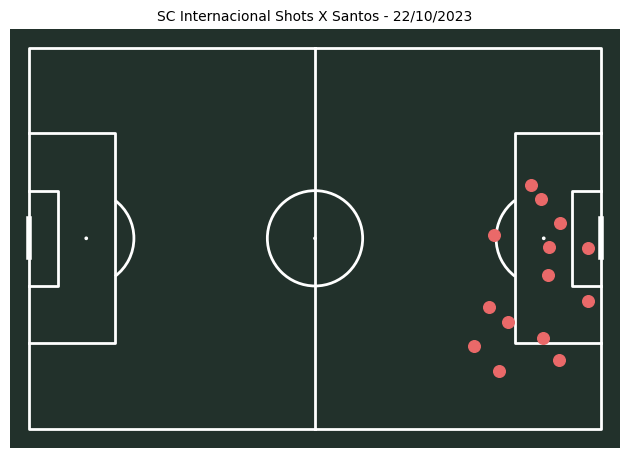

In [53]:

pitch = Pitch(pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw()

plt.gca().invert_xaxis()
plt.scatter(data["Coordenada X"],data["Coordenada Y"],c="#ea6969",s=70,alpha=1)

plt.title("SC Internacional Shots X Santos - 22/10/2023", fontsize=10)